In [31]:
import numpy as np
import pandas as pd
import scipy.signal as signal

In [32]:
data = pd.read_csv(r'C:\Users\Mehdi\Desktop\SS2021\CACOM\actirate\Data\1906-09-S70.csv',sep=';')
data.head()

,30371,868198,Unnamed: 2
0,30361,1439432,NaN
1,30362,1441589,NaN
2,30368,1441655,NaN
3,30358,1441726,NaN
4,30367,1703876,NaN


In [33]:
# Take second column (relevant)
x = data[data.columns[1]].to_numpy()#
print(x)
#Cut of the start of the measurement 
x = x[5:-1]  
print(x)
# normalize to zero mean               
x = x - np.mean(x)


[1439432 1441589 1441655 ... 1705684 1705694 1705705]
[1703784 1703818 1703863 ... 1705672 1705684 1705694]


In [34]:
# CONSTANTS
order = 5 
sampling_freq = 100
cutoff_freq_up = 4
cutoff_freq_down = 0.5
number_of_samples = x.shape[0]

time=np.linspace(0, (1/sampling_freq)*number_of_samples, num=number_of_samples, endpoint=False)


In [35]:
# Discrete filter, bandpass filter 
def filter_signal(x, upper_cutoff_frequency, low_cutoff_frequency):
    normalized_cutoff_freq = 2 * cutoff_freq_up / sampling_freq
    numerator_coeffs, denominator_coeffs = signal.butter(order, normalized_cutoff_freq,btype='low')
    #Filtrado
    filtered_signal_x = signal.lfilter(numerator_coeffs, denominator_coeffs, x)

    normalized_cutoff_freq = 2 * cutoff_freq_down / sampling_freq
    numerator_coeffs, denominator_coeffs = signal.butter(order, normalized_cutoff_freq,btype='high')
    #Filtrado
    filtered_signal_x = signal.lfilter(numerator_coeffs, denominator_coeffs, filtered_signal_x)
    return filtered_signal_x

filtered_signal_x = filter_signal(x,cutoff_freq_up,cutoff_freq_down)


In [30]:
from scipy.fft import fft,fftfreq

period = 1/sampling_freq
xf = fftfreq(number_of_samples, period)[:number_of_samples//2]

def get_spectrum(filtered_signal):
    signal_fourier = fft(filtered_signal)
    xf = fftfreq(number_of_samples, period)[:number_of_samples//2]
    return 2.0/number_of_samples * np.abs(signal_fourier[0:number_of_samples//2])

def get_max_frequency(filtered_signal):
    return xf[np.argmax(get_spectrum(filtered_signal))]

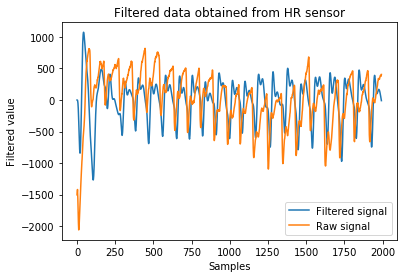

In [26]:
import matplotlib.pyplot as plt
plt.plot(filtered_signal_x)
plt.plot(x)
plt.legend(['Filtered signal','Raw signal'])
plt.xlabel('Samples')
plt.ylabel('Filtered value')
plt.title('Filtered data obtained from HR sensor')
plt.show()

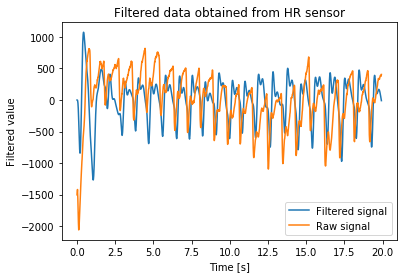

In [27]:
plt.plot(time,filtered_signal_x)
plt.plot(time,x)
plt.legend(['Filtered signal','Raw signal'])
plt.xlabel('Time [s]')
plt.ylabel('Filtered value')
plt.title('Filtered data obtained from HR sensor')
plt.show()

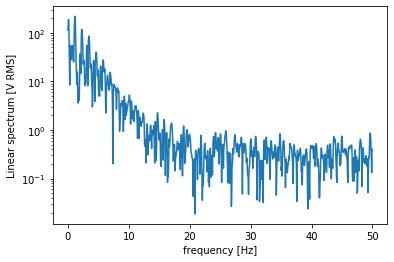

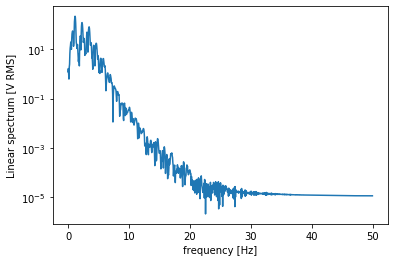

In [28]:
f, Pxx_spec = signal.periodogram(x, 100, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
f, Pxx_spec = signal.periodogram(filtered_signal_x, 100, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

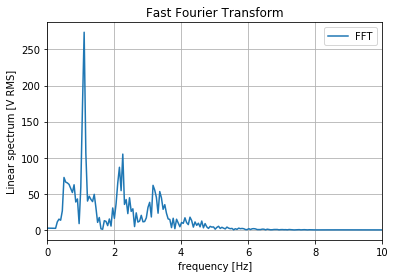

In [29]:
fig, ax = plt.subplots()

spectrum = get_spectrum(filtered_signal_x)

plt.plot(xf, spectrum)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Fast Fourier Transform')
# plt.axvline(xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))], color='green') # cutoff frequency
plt.xlim(0,10)
plt.legend(['FFT','Maximum'])
# ax.annotate('f = 1.1 Hz',
#             xy=(.25, .8), xycoords='figure fraction',
#             horizontalalignment='left', verticalalignment='top',
#             fontsize=12)
plt.grid()
plt.show()

In [30]:
freq = xf[np.argmax(spectrum)]
freq


1.1038635223281485

In [31]:
bpm = freq*60

In [32]:
bpm

66.23181133968892

Execution time: 2.1094412803649902


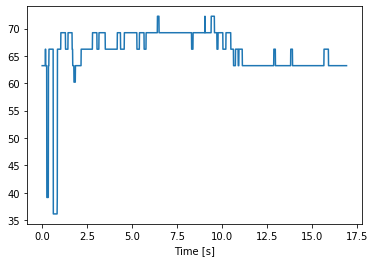

In [38]:
from scipy.fft import fft,fftfreq

frequencies = []
w=300

import time as timer
start = timer.time()

for i in range(number_of_samples-w):
    window = np.zeros(number_of_samples)
    window[i:i+w] = 1        
    windowed = filtered_signal_x*window
    
    windowed = filter_signal(windowed, 4, 0.7)

    frequencies.append(get_max_frequency(windowed))
    
plt.plot(time[0:len(frequencies)], [f*60 for f in frequencies])
plt.xlabel('Time [s]')

end = timer.time()
print("Execution time:", end - start)


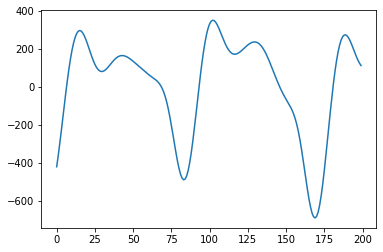

In [37]:
plt.plot(filtered_signal_x[300:500])